<br><br><font color="gray">DOING COMPUTATIONAL SOCIAL SCIENCE<br>MODULE 4 <strong>PROBLEM SETS</strong></font>

# <font color="#49699E" size=40>MODULE 4 </font>


# What You Need to Know Before Getting Started

- **Every notebook assignment has an accompanying quiz**. Your work in each notebook assignment will serve as the basis for your quiz answers.
- **You can consult any resources you want when completing these exercises and problems**. Just as it is in the "real world:" if you can't figure out how to do something, look it up. My recommendation is that you check the relevant parts of the assigned reading or search for inspiration on [https://stackoverflow.com](https://stackoverflow.com).
- **Each problem is worth 1 point**. All problems are equally weighted.
- **The information you need for each problem set is provided in the blue and green cells.** General instructions / the problem set preamble are in the blue cells, and instructions for specific problems are in the green cells. **You have to execute all of the code in the problem set, but you are only responsible for entering code into the code cells that immediately follow a green cell**. You will also recognize those cells because they will be incomplete. You need to replace each blank `▰▰#▰▰` with the code that will make the cell execute properly (where # is a sequentially-increasing integer, one for each blank).
- Most modules will contain at least one question that requires you to load data from disk; **it is up to you to locate the data, place it in an appropriate directory on your local machine, and replace any instances of the `PATH_TO_DATA` variable with a path to the directory containing the relevant data**.
- **The comments in the problem cells contain clues indicating what the following line of code is supposed to do.** Use these comments as a guide when filling in the blanks. 
- **You can ask for help**. 

Finally, remember that you do not need to "master" this content before moving on to other course materials, as what is introduced here is reinforced throughout the rest of the course. You will have plenty of time to practice and cement your new knowledge and skills.
<div class='alert alert-block alert-danger'>As you complete this assignment, you may encounter variables that can be assigned a wide variety of different names. Rather than forcing you to employ a particular convention, we leave the naming of these variables up to you. During the quiz, submit an answer of 'USER_DEFINED' (without the quotation marks) to fill in any blank that you assigned an arbitrary name to. In most circumstances, this will occur due to the presence of a local iterator in a for-loop.</b></div>

## Package Imports

In [16]:
import pandas as pd
import numpy as np
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples



import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

## Defaults

In [4]:
seed = 7

## Problem 1:

<div class="alert alert-block alert-info">  
In this exercise, we're going to ask you to supply the names of the Pandas methods you'll need to (1) load the .csv from disk and (2) preview a random sample of 5 rows.
</div>

<div class="alert alert-block alert-success">
In the code block below, fill in the blanks to insert the functions, methods, or variable names needed to load the .csv and draw a random sample of 5 rows.
</div>

In [21]:
# Load vdem_subset.csv as a dataframe
df = pd.read_csv("data/vdem_subset.csv", low_memory=False, index_col=0)

# Draw random sample of 5 rows from vdem dataframe
df.sample(5, random_state = 7)

,country_id,country_name,country_text_id,e_area,e_boix_regime,e_regiongeo,e_regionpol_6C,v2caviol,v2dlcommon,v2dlconslt,...,v2xcl_rol,v2xdd_dd,v2xeg_eqaccess,v2xeg_eqdr,v2xeg_eqprotec,v2xel_frefair,v2xel_locelec,v2xel_regelec,v2xlg_legcon,year
10294,70,Cape Verde,CPV,4054.303,1.0,6.0,4.0,-2.016,1.611,2.472,...,0.931,0.063,0.831,0.806,0.849,0.834,0.778,0.000,0.923,2006
6220,41,North Korea,PRK,NaN,NaN,12.0,6.0,0.619,-0.431,-1.265,...,0.019,NaN,0.283,0.358,0.211,0.000,0.097,0.044,NaN,1946
9862,67,Australia,AUS,NaN,1.0,15.0,5.0,NaN,1.635,1.533,...,0.879,0.269,0.711,0.729,0.531,0.884,0.992,0.975,0.893,1918
1996,13,Egypt,EGY,NaN,0.0,5.0,3.0,-0.664,-0.223,-0.849,...,0.460,0.000,0.296,0.089,0.310,0.000,0.000,0.000,0.723,1942
7029,48,Taiwan,TWN,36184.054,0.0,12.0,6.0,-0.392,-2.049,-1.062,...,0.304,0.000,0.181,0.438,0.502,0.000,0.064,0.071,0.128,1949


## Problem 2:
<div class="alert alert-block alert-info">  
You may have noticed that many of the cells in the dataframe we created have 'NaN' values. It's useful for us to know just how many values in our dataset are missing or not defined. Let's do that now:
</div>
<div class="alert alert-block alert-success">
In the code block below, fill in the blanks to insert the functions, methods, or variable names needed to create a Pandas series of the missing values for each column and then sort it.
</div>

In [22]:
# Sum together all NaN values to produce series with numerical values indicating number of missing entires
missing = df.isna().sum()

# Sort the `missing` series
missing = missing.sort_values()

print(missing)
print("Total missing values: " + str(sum(missing)))

country_id               0
v2x_suffr                0
year                     0
country_text_id          0
country_name             0
e_regiongeo              1
e_regionpol_6C           1
v2xeg_eqprotec          95
v2x_cspart              95
v2xcl_rol               95
v2dlengage              96
v2dlconslt              96
v2xeg_eqaccess         116
v2x_elecoff            123
v2xel_frefair          159
v2x_freexp_altinf      188
v2x_frassoc_thick      242
v2x_polyarchy          399
v2xel_regelec          500
v2x_partipdem          550
v2x_jucon              715
v2x_libdem             901
v2xel_locelec         1936
v2xeg_eqdr            3761
v2dlcommon            3762
v2dlreason            3762
v2dlcountr            3762
v2x_egaldem           3828
v2x_delibdem          3828
e_boix_regime         3865
v2xlg_legcon          4266
v2xdd_dd              5800
v2caviol              6485
e_area                7157
v2smprivex           10512
v2smpolsoc           10512
dtype: int64
Total missing v

## Problem 3:
<div class="alert alert-block alert-info">
The list below contains a number of variables, including mid-level indicators that go into the 5 high-level democracy indexes that were used in the assigned readings. In this problem, we'll subset our data in two ways - first conceptually by selecting only the mid-level indicators, and then empirically by selecting the indicators that heave the least missing data.
</div>

<div class="alert alert-block alert-success">
Use the list of column names we've provided to filter the large dataframe into a subset. Fill in the blanks to insert the functions, methods, or variable names needed.
</div>

In [24]:
vd_meta_vars = ['country_name', 'year', 'e_regiongeo']
vd_index_vars = ['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff',    # electoral democracy index
              'v2xcl_rol', 'v2x_jucon', 'v2xlg_legcon',                                                 # liberal democracy index
              'v2x_cspart', 'v2xdd_dd', 'v2xel_locelec', 'v2xel_regelec', 'v2x_polyarchy',              # participatory democracy index
              'v2dlreason', 'v2dlcommon', 'v2dlcountr', 'v2dlconslt', 'v2dlengage',                     # deliberative democracy index
              'v2xeg_eqprotec', 'v2xeg_eqaccess', 'v2xeg_eqdr']                                         # egalitarian democracy index

# filter `df` so that it only includes columns from the two lists above
sdf = df[vd_meta_vars + vd_index_vars]

sdf.describe()

,year,e_regiongeo,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff,v2xcl_rol,v2x_jucon,v2xlg_legcon,...,v2xel_regelec,v2x_polyarchy,v2dlreason,v2dlcommon,v2dlcountr,v2dlconslt,v2dlengage,v2xeg_eqprotec,v2xeg_eqaccess,v2xeg_eqdr
count,11941.000000,11940.000000,11753.000000,11699.000000,11941.000000,11782.000000,11818.000000,11846.000000,11226.000000,7675.000000,...,11441.000000,11542.000000,8179.000000,8179.000000,8179.000000,11845.000000,11845.000000,11846.000000,11825.000000,8180.000000
mean,1925.256092,11.363652,0.432425,0.390653,0.476800,0.271310,0.454775,0.410037,0.478507,0.476204,...,0.287414,0.254728,-0.215734,-0.340290,-0.312484,-0.338769,-0.327566,0.359756,0.333124,0.358763
std,62.798367,5.510500,0.302358,0.311612,0.439733,0.323768,0.478748,0.297414,0.282800,0.294713,...,0.355907,0.250076,1.561011,1.563223,1.440434,1.364467,1.407394,0.283572,0.274760,0.286641
min,1789.000000,1.000000,0.012000,0.015000,0.000000,0.000000,0.000000,0.000000,0.005000,0.017000,...,0.000000,0.008000,-3.445000,-3.801000,-3.479000,-3.213000,-3.192000,0.011000,0.013000,0.013000
25%,1878.000000,6.000000,0.156000,0.089000,0.000000,0.000000,0.000000,0.148000,0.223000,0.192000,...,0.019000,0.058000,-1.371000,-1.468000,-1.455000,-1.435000,-1.515000,0.102000,0.097000,0.107000
50%,1935.000000,13.000000,0.371000,0.306000,0.420000,0.128000,0.000000,0.341000,0.469000,0.467000,...,0.075000,0.173000,-0.228000,-0.176000,-0.275000,-0.570000,-0.528000,0.299000,0.238000,0.293000
75%,1977.000000,17.000000,0.721000,0.673000,1.000000,0.491000,1.000000,0.662000,0.722000,0.765000,...,0.469000,0.357750,0.946000,0.950000,0.860000,0.650000,0.684000,0.606000,0.553000,0.571000
max,2019.000000,19.000000,0.980000,0.954000,1.000000,0.985000,1.000000,0.993000,0.986000,0.985000,...,0.997000,0.924000,3.629000,2.833000,3.170000,3.843000,3.368000,0.976000,0.980000,0.980000


## Problem 4:

<div class="alert alert-block alert-info">
One useful thing that using Pandas dataframes enables us to do is group data based on one or more the columns and then work with the resulting grouped dataframe (in much the same way we would with an un-grouped dataframe). Using the VDEM data, we'll only import a subset of the data, using the 'columns_to_use' variable. At the same time, we're going to replace the numerical values in the 'e_regionpol_6c' variable with easy-to-read string representations. Finally, we'll filter the resulting dataset to include only those rows from the year 2015.
</div>
<div class="alert alert-block alert-success">
In this next code block, we're going to load in a dataset, filtering our dataframe to include only those rows where the year is 2015. Fill in the blanks to continue.
</div>

In [25]:
columns_to_use = [
    'country_name',
    'country_id',
    'year',
    'e_area',
    'e_regionpol_6C',
    'v2x_polyarchy',
    'v2x_libdem',
    'v2x_partipdem',
    'v2x_delibdem',
    'v2x_egaldem'
]

# Load the dataset as a dataframe
df = pd.read_csv(
    "data/vdem_subset.csv",
    usecols = columns_to_use,
    low_memory = False
)

df['e_regionpol_6C'].replace({
    1.0: "East Europe and Central Asia",
    2.0: "Latin America and Carribean",
    3.0: "Middle East and North Africa",
    4.0: "Sub-Saharan Africa",
    5.0: "West Europe and North America",
    6.0: 'Asia and Pacific'
}, inplace=True)


# Subset the dataframe to include only those rows from 2015
df_2015 = df.query("year == 2015")

df_2015

,country_id,country_name,e_area,e_regionpol_6C,v2x_delibdem,v2x_egaldem,v2x_libdem,v2x_partipdem,v2x_polyarchy,year
226,3,Mexico,1965660.690,Latin America and Carribean,0.511,0.360,0.429,0.408,0.649,2015
346,4,Suriname,145952.274,Latin America and Carribean,0.616,0.597,0.667,0.530,0.801,2015
577,5,Sweden,444337.592,West Europe and North America,0.855,0.825,0.856,0.631,0.898,2015
799,6,Switzerland,41475.571,West Europe and North America,0.844,0.806,0.852,0.783,0.888,2015
917,7,Ghana,240585.520,Sub-Saharan Africa,0.590,0.560,0.618,0.374,0.736,2015
...,...,...,...,...,...,...,...,...,...,...
10936,74,Timor-Leste,15138.824,Asia and Pacific,0.440,0.390,0.484,0.355,0.667,2015
11126,75,Ecuador,257026.691,Latin America and Carribean,0.388,0.425,0.292,0.401,0.563,2015
11357,76,France,547871.255,West Europe and North America,0.810,0.805,0.788,0.628,0.876,2015
11584,77,Germany,356448.186,West Europe and North America,0.829,0.805,0.835,0.630,0.878,2015


## Problem 5:
<div class="alert alert-block alert-info">
Now, we're going to use the Pandas Dataframe's `groupby` method to combine each nation into the region it belongs to. As you would have read in the accompanying chapter, the Pandas groupby method only preserves columns that you give it instructions for; everything else is dropped in the resulting dataframe. 
<br><br>
In order to figure out how to aggregate each of our columns, let's think through them together. First up, we have 'country_name' and 'country_ID'. Since we're going to be grouping our data into only 6 rows (one for each of the 6 politico-geographical regions), it doesn't make sense to keep either of these columns. The same goes for 'year', since we will have already filtered our dataset to only include rows that are from 2015. We're going to be using 'e_regionpol_6C' as the basis for our groupings, so it doesn't make sense to keep it as a data column any longer. 
<br><br>
That leaves us with 'e_area' and the 5 democracy indices. Since we're interested in knowing the total area of each region, it would make sense to <b>add</b> each country's area together. We could do something similar for the 5 democracy indices, but we'll leave them alone for now. In order to make things easier on ourselves, we're going to start by filtering out all of the columns we don't want in our final dataset, which will make aggregating what's left much easier.
</div>

<div class="alert alert-block alert-success">
In the following code cell, we're going to filter out most of the columns in `df_2015` so that only 'e_regionpol_6C' and 'e_area' remain, and store the resulting filtered dataframe as `df_area`. Then, we're going to run a `groupby` operation on the `e_regionpol_6C` column of and sum the `e_area` column in the `df_area` dataframe. Fill in the blanks to continue. 
</div>

In [26]:
# Filter out all columns except 'e_regionpol_6C', 'e_area'
df_area = df_2015[['e_regionpol_6C', 'e_area']]

# group by political region and sum remaining columns
df_grouped_area = df_area.groupby('e_regionpol_6C').sum()

df_grouped_area

,e_area
e_regionpol_6C,
Asia and Pacific,9.538323e+06
East Europe and Central Asia,1.717778e+07
Latin America and Carribean,1.932756e+07
Middle East and North Africa,1.468861e+06
Sub-Saharan Africa,1.561678e+07
West Europe and North America,2.859339e+07


## Problem 6:


<div class="alert alert-block alert-info">
In the last question, we explored how we could use Pandas to group rows of a dataframe according to a variable's value, and to handle a subset of the remaining columns according to some kind of aggregation logic (such as adding the values or averaging over them). This time, rather than lumping countries together by region, we're going to drill deeper on how an individual nation has changed over time. For this exercise, we're going to look at how democratic norms in Costa Rica have developed in the decades since the Second World War. Since we already have the full dataframe stored in memory (as 'df'), we'll start by filtering our dataset to include only those rows pertaining to Costa Rica (across all years, not just 2015). 
<br><br>
If you examine the resulting dataframe, you might notice that Costa Rica does not have any scores for the 5 democratic indices the earlier years for which it is present in the dataset. This should come as no surprise; even for a group as capable as the VDEM project, constructing a democratic index for the year 1839 would involve enough guesswork to render the result meaningless. As such, we're going to immediately filter our Costa Rica-only dataframe to weed out any rows that don't have scores for the 5 democratic indices. 
</div>
<div class="alert alert-block alert-success">
Find the first year for which we have a complete set of the democratic indices for Costa Rica. Fill in the blanks to continue.
</div>

In [29]:
# Filter the dataframe to include only rows pertaining to Costa Rica
df_cr = df.query("country_name == 'Costa Rica'")

# Drop each row with one or more missing values
df_cr_filtered = df_cr.dropna(subset=[
    'v2x_polyarchy',
    'v2x_libdem',
    'v2x_partipdem',
    'v2x_delibdem',
    'v2x_egaldem'])

# Find first year for which VDEM has a complete set of indices for Costa Rica
first_year = min(df_cr_filtered['year'])

first_year

1900

## Problem 7:
<div class="alert alert-block alert-info">
Now our data is ready to be plotted! In this part of the exercise, we're going to plot two of Costa Rica's democratic indices against the 'year' variable to see how its democratic norms have evolved over time. We'll accomplish this by using Seaborn and taking advantage of the fact that the columns in Pandas Dataframes can be individually 'pulled out' as a Series (which operate similarly to Numpy arrays, for most intents and purposes). In the following code cell, we'll create the plot for you so you can see how it's done and what it should look like. It won't be graded, and there aren't any blanks to fill in.
<br><br>Despite being as simple as can be, that doesn't look half bad! It's always a good idea to label your axes and give the plot a title so that anyone encoutering it for the first time can rapidly determine what the plot represents.
<br><br>A quick note; if you want to see what the first label-less plot looks like before adding labels to the second plot, you can comment out each of the lines below the first instance of <code>figure.show()</code>.
</div>

<div class="alert alert-block alert-success">
Add useful labels to the x-axis and y-axis of the second plot produced by the code cell below, along with a title describing what the plot is. Fill in the blanks to continue. 
</div>

C:\Users\jeffr\AppData\Local\Temp\ipykernel_9116\1011129226.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
C:\Users\jeffr\AppData\Local\Temp\ipykernel_9116\1011129226.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


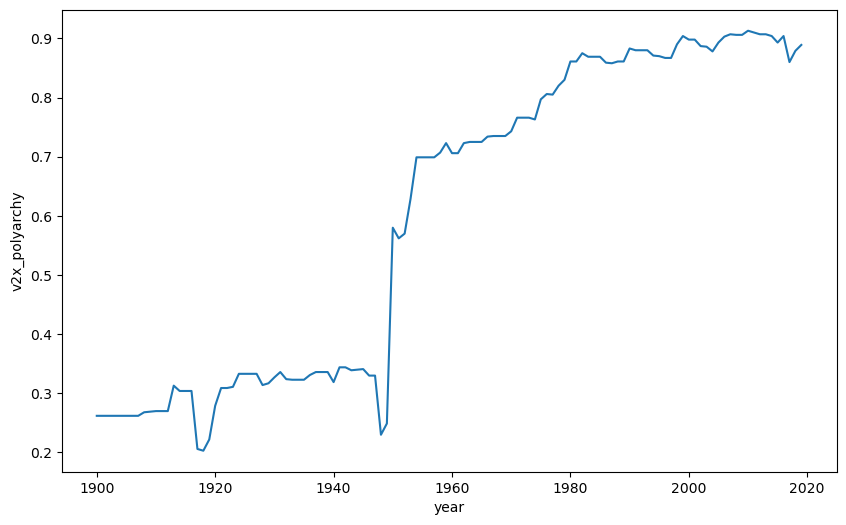

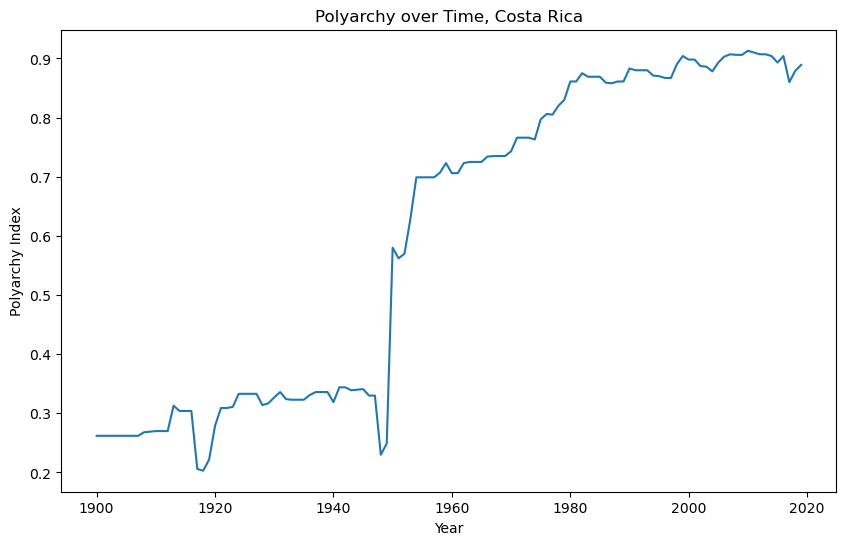

In [31]:
cr_years = df_cr_filtered['year']
cr_polyarchy = df_cr_filtered['v2x_polyarchy']

figure = plt.figure(figsize=(10, 6))
sns.lineplot(x = cr_years, y = cr_polyarchy)
figure.show()

figure = plt.figure(figsize=(10, 6))
sns.lineplot(x = cr_years, y = cr_polyarchy)
# Label y-axis
plt.ylabel('Polyarchy Index')
# Label x-axis
plt.xlabel('Year')
# Add title
plt.title("Polyarchy over Time, Costa Rica")
figure.show()

## Problem 8:

<div class="alert alert-block alert-info">
In this exercise, we're going to work through how to combine multiple pandas dataframes. This will come in handy whenever you want to explore the relationships between variables that come from different datasets, but which can be linked according to some underlying relationship. 
<br><br>
Earlier, we used addition to aggregate the land area of every nation in a politico-geographic region to give us a sense of how large each region was. In this exercise, we're going to turn our attention to the 5 democracy indices. Using addition (which is what we did with area) to aggregate the 5 democracy indices doesn't make as much sense, though: that might lead us to conclude that regions with more countries would be 'more democratic' than those with only a small number of nations. Instead, we'll *average* over these indicators, which will give us a sense of how democratic each region is, taken together. 
</div>
<div class="alert alert-block alert-success">
Create a dataframe that only includes the columns we care about (the region variable and the 5 democratic indices), group the result by region, and take the average across each score. 
</div>

In [32]:
df_democracy = df_2015[['v2x_polyarchy',
    'v2x_libdem',
    'v2x_partipdem',
    'v2x_delibdem',
    'v2x_egaldem',
     'e_regionpol_6C']]

# Group by region and take average of other variables
df_grouped_democracy = df_democracy.groupby('e_regionpol_6C').mean()

df_grouped_democracy 

,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem
e_regionpol_6C,,,,,
Asia and Pacific,0.499118,0.365471,0.311118,0.388353,0.341706
East Europe and Central Asia,0.584000,0.445250,0.347000,0.377750,0.464500
Latin America and Carribean,0.649563,0.478187,0.432063,0.486812,0.421875
Middle East and North Africa,0.301000,0.163000,0.167000,0.194000,0.156333
Sub-Saharan Africa,0.484375,0.351333,0.287167,0.366625,0.316583
West Europe and North America,0.877875,0.818625,0.641750,0.811000,0.773500


## Problem 9:
<div class="alert alert-block alert-info">
If you compare the 'df_grouped_democracy' dataframe and the 'df_grouped_area' dataframe, you might notice that the bolded columns on the left are identical. You may recall that the bold column on the left of a dataframe is the 'index', and we can take advantage of its special status to join the two dataframes together. The result will be one dataframe with the same number of rows, but with all 6 of the columns we aggregated: area and the 5 democratic indices.
</div>
<div class="alert alert-block alert-success">
In the following code block, we're going to concatenate `df_grouped_democracy` and `df_grouped`area. Fill in the blanks to continue. 
</div>

In [33]:
# Concatenate df_grouped_democracy and df_grouped_area on rows
df_full_rows = pd.concat([df_grouped_democracy, df_grouped_area], axis=1)

df_full_rows

,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,e_area
e_regionpol_6C,,,,,,
Asia and Pacific,0.499118,0.365471,0.311118,0.388353,0.341706,9.538323e+06
East Europe and Central Asia,0.584000,0.445250,0.347000,0.377750,0.464500,1.717778e+07
Latin America and Carribean,0.649563,0.478187,0.432063,0.486812,0.421875,1.932756e+07
Middle East and North Africa,0.301000,0.163000,0.167000,0.194000,0.156333,1.468861e+06
Sub-Saharan Africa,0.484375,0.351333,0.287167,0.366625,0.316583,1.561678e+07
West Europe and North America,0.877875,0.818625,0.641750,0.811000,0.773500,2.859339e+07


## Problem 10:
<div class="alert alert-block alert-info">
In the above exercise, we combined dataframes along their rows, using the row index to guide how the data was combined. We can do much the same with columns. To demonstrate how, let's return to our Costa Rica dataframe and add another country to it. Since Costa Rica and Nicaragua are geographic neighbours, it makes sense to compare them directly. 
</div>
<div class="alert alert-block alert-success">
Time to give Nicaragua the same treatment as we did to Costa Rica! Once that's done, we're going to concatenate `df_nicaragua_filtered` and `df_nicaragua_cr`, column-wise. Fill in the blanks to continue.
</div>

In [37]:
# Create a dataframe only containing rows pertaining to Nicaragua
df_nicaragua = df.query("country_name == 'Nicaragua'")

# Drop rows in the Nicaragua dataframe that contain NaNs in the 5 index columns 
df_nicaragua_filtered = df_nicaragua.dropna(subset=[
    'v2x_polyarchy',
    'v2x_libdem',
    'v2x_partipdem',
    'v2x_delibdem',
    'v2x_egaldem'])

# Concatenate df_grouped_democracy and df_grouped_area on columns
df_nicaragua_cr = pd.concat([df_nicaragua_filtered, df_cr_filtered], axis = 0)

df_nicaragua_cr

,country_id,country_name,e_area,e_regionpol_6C,v2x_delibdem,v2x_egaldem,v2x_libdem,v2x_partipdem,v2x_polyarchy,year
8752,59,Nicaragua,NaN,Latin America and Carribean,0.030,0.021,0.062,0.029,0.107,1901
8753,59,Nicaragua,NaN,Latin America and Carribean,0.029,0.020,0.061,0.041,0.099,1902
8754,59,Nicaragua,NaN,Latin America and Carribean,0.029,0.020,0.061,0.041,0.099,1903
8755,59,Nicaragua,NaN,Latin America and Carribean,0.029,0.020,0.061,0.041,0.099,1904
8756,59,Nicaragua,NaN,Latin America and Carribean,0.029,0.020,0.061,0.042,0.101,1905
...,...,...,...,...,...,...,...,...,...,...
10816,73,Costa Rica,51402.625,Latin America and Carribean,0.834,0.800,0.843,0.673,0.893,2015
10817,73,Costa Rica,51402.625,Latin America and Carribean,0.832,0.779,0.857,0.668,0.904,2016
10818,73,Costa Rica,51402.625,Latin America and Carribean,0.806,0.766,0.809,0.621,0.860,2017
10819,73,Costa Rica,51402.625,Latin America and Carribean,0.820,0.782,0.812,0.648,0.879,2018


## Problem 11:
<div class="alert alert-block alert-info">
Now that the data for these two countries has been combined into a single dataframe, we can easily create plots that allow us to compare them. Again, we'll be using the Seaborn package to do our plotting for us. Even though all of our data is lumped together, Seaborn allows us to use the 'hue' variable to differentiate the data we're plotting based on some categorical variable (which, in this case, is the country variable -- it's what differentiates between Costa Rica and Nicaragua). 
</div>
<div class="alert alert-block alert-success">
Create a line plot that contains separate lines for both Nicaragua's and Costa Rica's polyarchy score by year. We'll also include labels for the x-axis, y-axis, and plot title. Fill in the blanks to continue.
</div>

C:\Users\jeffr\AppData\Local\Temp\ipykernel_9116\2307020097.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


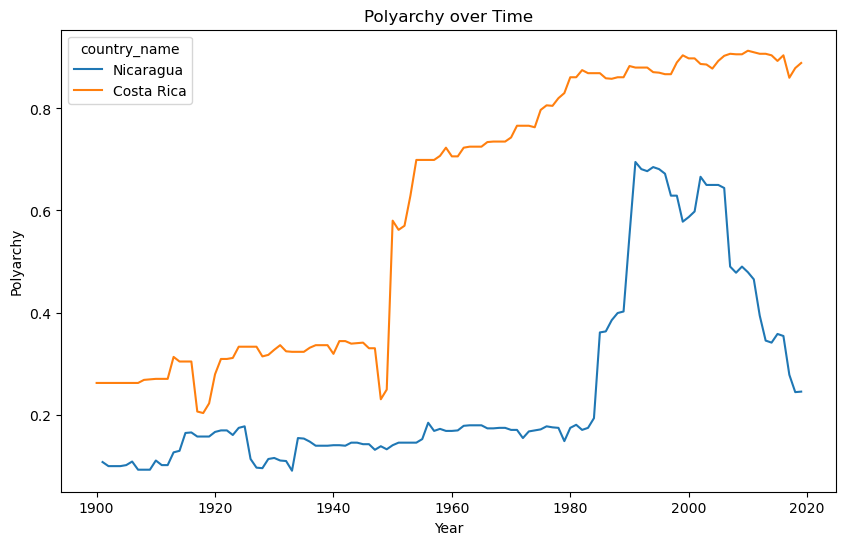

In [38]:
concat_years = df_nicaragua_cr['year']
concat_polyarchy = df_nicaragua_cr['v2x_polyarchy']
concat_country = df_nicaragua_cr['country_name']

figure = plt.figure(figsize=(10,6))
ax = sns.lineplot(x=concat_years,
             y=concat_polyarchy,
             hue=concat_country
            )
ax.set(xlabel='Year', ylabel='Polyarchy', title="Polyarchy over Time")

figure.show()